# 分類問題への適用

scikit-learnのIrisデータセットを用いた分類問題の実践を行う
- パーセプトロン
- SVM

In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# irisデータのインスタンス生成
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 特徴量の確認
columns = iris.feature_names
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#説明変数を確認
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# 目的変数を確認
# 0→setosa 1→versicolor 2→virginica
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## データの観察

In [7]:
# PandasのDataFrame型に変換
X_df = pd.DataFrame(X, columns=columns)
y_df = pd.DataFrame(y, columns=['speacies'])
df = pd.concat([X_df, y_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speacies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# 基本統計量の出力
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speacies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


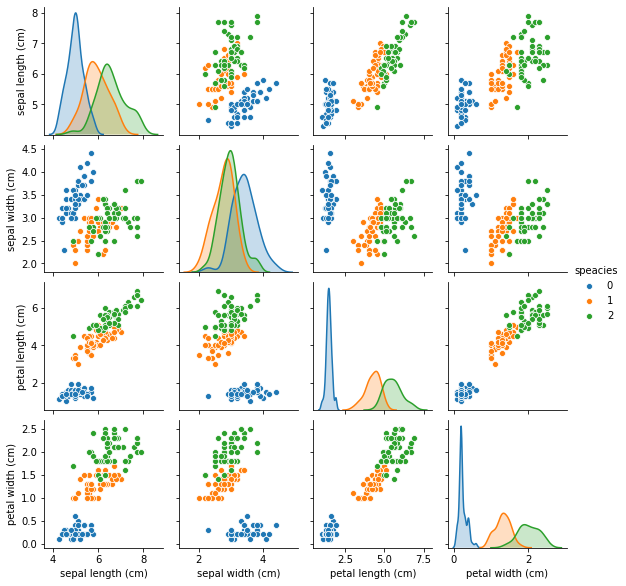

In [9]:
# 散布図行列を出力（時間がかかります）
import seaborn as sns
sns.pairplot(df, hue='speacies', height=2.0)
plt.show()

In [10]:
# 相関係数行列
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speacies
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
speacies,0.782561,-0.426658,0.949035,0.956547,1.000000


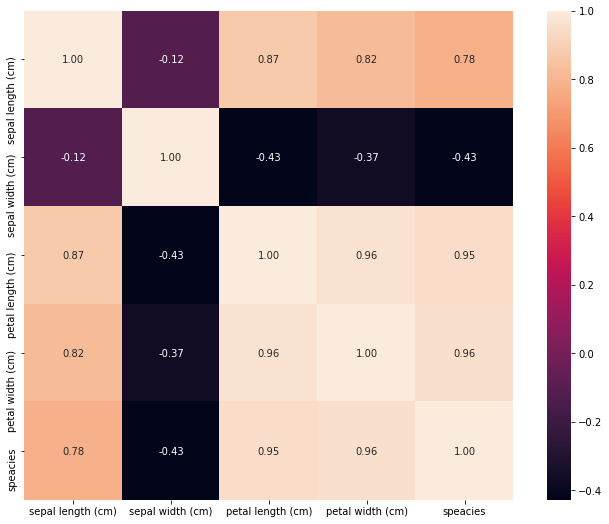

In [11]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot：数値を表示するか
# square：正方形で表示するか
# fmt：表示する数値の型（.2f→float型で小数点以下２桁表示）
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

今回はpetal length（花びらの長さ）とpetanl width（花びらの幅）の説明変数を用いて２クラス分類を行う

## 前処理

In [12]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [13]:
# 特徴の選択（petal lengthとpetanl width）
X_1 = X_std[0:100, [2, 3]]
y_1 = y[:100]

In [14]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [15]:
# 分割されたデータの個数を確認
print(X.shape)
print(y.shape)
print(X_1_train.shape)
print(y_1_train.shape)
print(X_1_test.shape)
print(y_1_test.shape)

(150, 4)
(150,)
(70, 2)
(70,)
(30, 2)
(30,)


## パーセプトロンを用いた２クラス分類

In [16]:
# パーセプトロンを用いて学習を行う
from sklearn.linear_model import Perceptron
# eta0→学習率（関数を動かす幅）
ppn_1 = Perceptron(eta0=0.1) 
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
# ２次元データの決定曲線をプロットする関数
# (X, y, 分類器)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


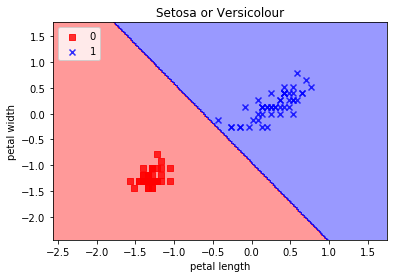

In [18]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_1, y_1, ppn_1)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

In [19]:
# 正答率を出力
print('train acc: %.3f' % ppn_1.score(X_1_train, y_1_train))
print('test acc: %.3f' % ppn_1.score(X_1_test, y_1_test))

train acc: 1.000
test acc: 1.000


In [20]:
# testデータのindexを指定
index = 2

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_1_test[index])
print('predict: %d' % ppn_1.predict(X_1_test[index].reshape(1, -1)))

answer : 0
predict: 0


### 多クラス分類

In [21]:
# versinica含むすべてのサンプルを選択
# sepal lengthとpetal lengthを利用
X_2 = X_std[:,[2, 3]]
y_2 = y

In [22]:
# データの分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

In [23]:
# パーセプトロンの学習
from sklearn.linear_model import Perceptron
ppn_2 = Perceptron(eta0=0.1)
ppn_2.fit(X_2_train, y_2_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


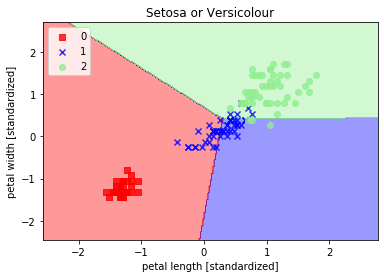

In [24]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_2, y_2, ppn_2)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

In [25]:
# 正答率を出力
print('train acc: %.3f' % ppn_2.score(X_2_train, y_2_train))
print('test acc: %.3f' % ppn_2.score(X_2_test, y_2_test))

train acc: 0.783
test acc: 0.867


In [26]:
# testデータのindexを指定
index = 1

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_2_test[index])
print('predict: %d' % ppn_2.predict(X_2_test[index].reshape(1, -1)))

answer : 1
predict: 0


## SVM

In [27]:
# irisデータセットの読み込み
# 品種: SetosaとVersicolour（線形分離可能）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[:100,[2,3]]
y_1 = iris.target[:100]

In [28]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

In [29]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

In [30]:
# 線形SVCの学習
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_1_train, y_1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


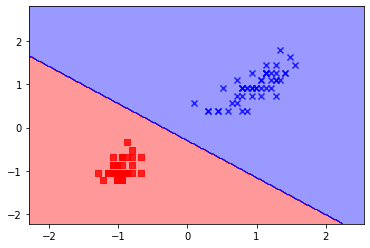

In [31]:
# 決定曲線をプロット
plot_decision_regions(X_1_std, y_1, svc)

In [32]:
# 正答率を出力
svc.score(X_1_test, y_1_test)

1.0

In [33]:
# irisデータセットの読み込み
# 品種: VersicolourとVirsiniga（線形分離不可能①）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_2 = iris.data[50:150,[2,3]]
y_2 = iris.target[50:150]

In [34]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2_std = scaler.transform(X_2)

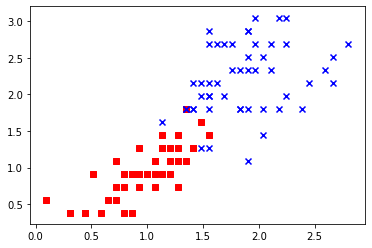

In [35]:
# 散布図を出力
plt.scatter(X_2_std[:50, [0]], X_2_std[:50, [1]], color='red', marker='s')
plt.scatter(X_2_std[50:100, [0]], X_2_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [36]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size=0.3, random_state=0)

In [37]:
# 線形SVCの学習
from sklearn.svm import SVC
# Cは正則化項、小さくするほど誤分類を許容
svc_slack = SVC(kernel='linear', C=1.0)
svc_slack.fit(X_2_train, y_2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


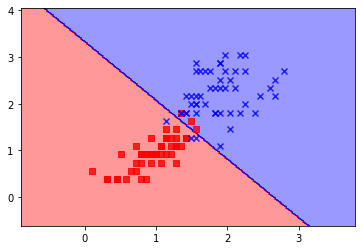

In [38]:
# 決定境界の出力
plot_decision_regions(X_2_std, y_2, svc_slack)

In [39]:
# 正答率を出力
svc_slack.score(X_2_test, y_2_test)

0.9666666666666667

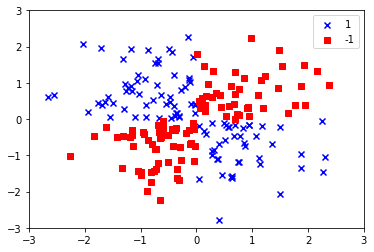

In [40]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [41]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [42]:
# 線形SVMによる学習
linear_svm = SVC(kernel='linear', C=0.1)
linear_svm.fit(X_xor_train, y_xor_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


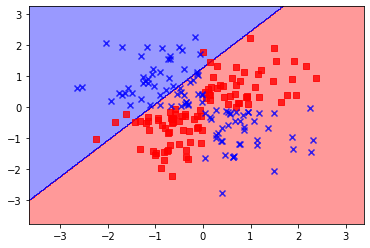

In [43]:
# 決定曲線のプロット
plot_decision_regions(X_xor, y_xor, classifier=linear_svm)

In [44]:
# 正答率を出力
linear_svm.score(X_xor_test, y_xor_test)

0.6166666666666667

In [45]:
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=10)
rbf_svm.fit(X_xor_train, y_xor_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


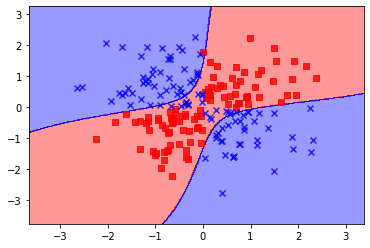

In [46]:
# 決定曲線のプロット
plot_decision_regions(X_xor, y_xor, classifier=rbf_svm)

In [47]:
# 正答率を出力
rbf_svm.score(X_xor_test, y_xor_test)

0.9

In [48]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [49]:
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [50]:
# GridSearchCVのインスタンスを生成
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [51]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_svc.fit(X_xor_train, y_xor_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
# test精度の平均が最も高かった組み合わせを出力
gs_svc.best_params_

{'C': 1000, 'gamma': 0.1}

In [53]:
# そのときのtest精度の平均を出力
gs_svc.best_score_

0.9642857142857142

In [54]:
# ホールド・アウト法によるtest精度を出力
gs_svc.score(X_xor_test, y_xor_test)

0.9666666666666667

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


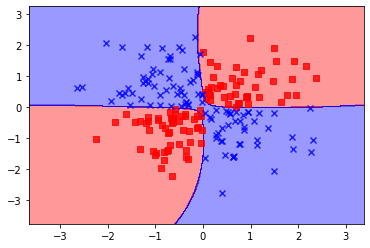

In [55]:
# 決定境界の出力
plot_decision_regions(X_xor, y_xor, gs_svc)

### レポート課題

#### （１）Breast Cancer Wisconsinデータセットを用いて、ガン腫瘍の分類モデルを構築してください。
参考：https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [56]:
# breast_cancerデータセットの読み込み
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

#### （２）モデルを選んだ理由とその根拠を述べてください。（評価指標や可視化の結果などを基に述べると良い）（100字程度）

#### （３）ガン腫瘍の分類モデルとして、医療の現場で実際に用いる場合の問題点を述べてください。（100字程度）
※問題点がなければ有効性の根拠を述べてください。